<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-capeju/blob/main/Reduccion_dimensiones_A01793931.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ACTIVIDAD SEMANA 5 – REPASO TRANSFORMACIÓN Y REDUCCIÓN DE DIMENSIONES**

CIENCIA Y ANALÍTICA DE DATOS


**PRESENTADO POR:**

Carlos Jesús Peñaloza Julio

Matrícula: A01793931


**PROFESORA:**

María de la Paz Rico Fernández PhD.


OCTUBRE 26 DE 2022

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [75]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.dot(W,D)
B = np.dot(B,Winv)
B.round(2)
print(B)
print("-----------------------------")

A == B

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


array([[False, False, False],
       [False, False,  True],
       [False, False,  True]])

In [76]:
#Matriz 1
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A1)
print("-----------------------------")

# Calculo la eigendescomposición
values, vectors = eig(A1)
print(values) #D1
print(vectors) #W1

#Reconstrucción
values, vectors = np.linalg.eig(A1)
W1 = vectors
Winv1 = np.linalg.inv(W1)
D1 = np.diag(values)
print("-------Matriz reconstruida-------")
B1 = np.dot(np.dot(W1,D1),Winv1)
print(B1.round(2).real.astype(int)) #Se expresa como entero usando astype(int) para obtener un resultado más limpio.
print("-----------------------------")

A1 == B1 # Compara las dos matrices

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------


array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [77]:
#Matriz 2
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")

# Calculo la eigendescomposición
values, vectors = eig(A2)
print(values) #D2
print(vectors) #W2

#Reconstrucción de la matriz
values, vectors = np.linalg.eig(A2)
W2 = vectors
Winv2 = np.linalg.inv(W2)
D2 = np.diag(values)
print("-------Matriz reconstruida-------")
B2 = np.dot(np.dot(W2,D2),Winv2)
print((B2.round().real).astype(int)) #Se expresa como entero usando astype(int) para obtener un resultado más limpio.
print("-----------------------------")

A2 == B2 # Compara las dos matrices

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------


array([[ True,  True, False],
       [ True, False, False],
       [ True,  True,  True]])

In [78]:
#Matriz 3
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A3)
print("-----------------------------")

# Calculo la eigendescomposición
values, vectors = eig(A3)
print(values) #D3
print(vectors) #W3

#Reconstrucción de la matriz
values, vectors = np.linalg.eig(A3)
W3 = vectors
Winv3 = np.linalg.inv(W3)
D3 = np.diag(values)
print("-------Matriz reconstruida-------")
B3 = np.dot(np.dot(W3,D3),Winv3)
print(B3.round().real.astype(int)) #Se expresa como entero usando astype(int) para obtener un resultado más limpio.
print("-----------------------------")

A3 == B3 # Compara las dos matrices

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------


array([[False, False, False],
       [False, False, False],
       [False, False, False]])

***CONCLUSIONES:***

*Luego de haber realizado el ejercicio con las tres (3) matrices, se pudo comprobar la aplicación del cálculo de la covarianza y la reconstucción de la matriz, por supuesto en cada reconstrucción se devolvieron valores imaginarios que no son para asustarse porque se interpretan como parte del cálculo del algoritmo. También se obtuvieron valores negativos menores que cero (0) que haciendo una aproximación puede interpretarse como 0.*

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


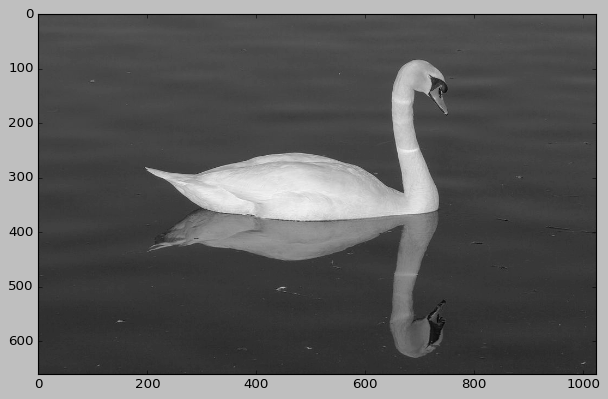

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F11F749FC90>


In [79]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [80]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [81]:
U.shape

(660, 660)

In [82]:
V.shape

(1024, 1024)

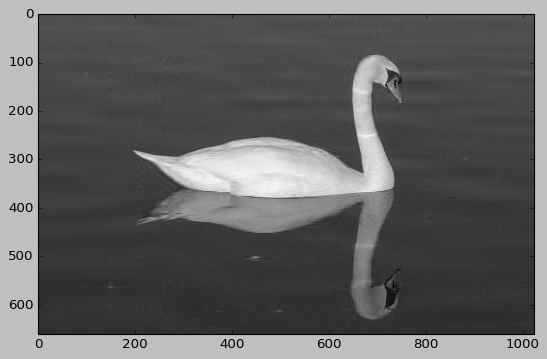

Felicidades la imagen está comprimida


In [83]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[107. 108. 109. ... 149. 147. 144.]


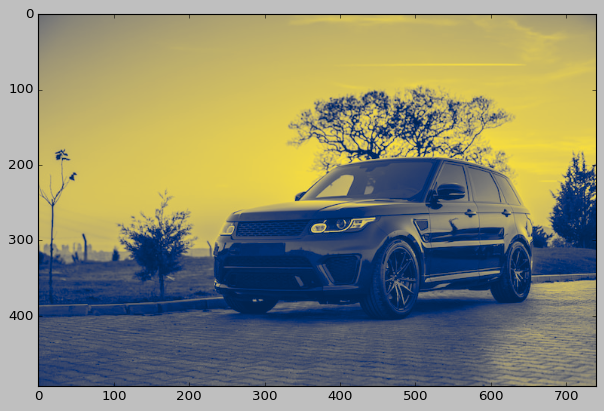

<PIL.Image.Image image mode=LA size=740x493 at 0x7F11F73C3150>


In [84]:
#imagen 1

from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('classic')

img1 = Image.open(urllib.request.urlopen('https://img.freepik.com/foto-gratis/jeep-azul-estacionamiento-zona-publica_114579-4042.jpg?w=740&t=st=1666794750~exp=1666795350~hmac=68cf998e9a0d842362a4bceccf4038b85e168df30a0665f8802b29f0c581c938')).convert('LA')

imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)

print(imgmat1)

imgmat1.shape = (imggray1.size[1],imggray1.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='cividis')
plt.show()
print(img1)

In [85]:
U1,D1,V1 = np.linalg.svd(imgmat1)
imgmat1.shape

(493, 740)

In [86]:
U1.shape

(493, 493)

In [87]:
V1.shape

(740, 740)

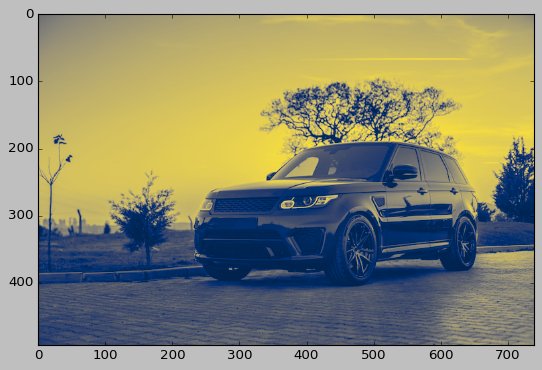

Felicidades la imagen está comprimida


In [88]:
#juega con el valor nvalue y ve que pasa con otros valores
nvalue1 = 490
#------------------------------
reconstimg1 = np.matrix(U1[:,:nvalue1])*np.diag(D1[:nvalue1])*np.matrix(V1[:nvalue1,:])
plt.imshow(reconstimg1,cmap='cividis')
plt.show()
print("Felicidades la imagen está comprimida")

[217. 216. 214. ... 131.   2. 127.]


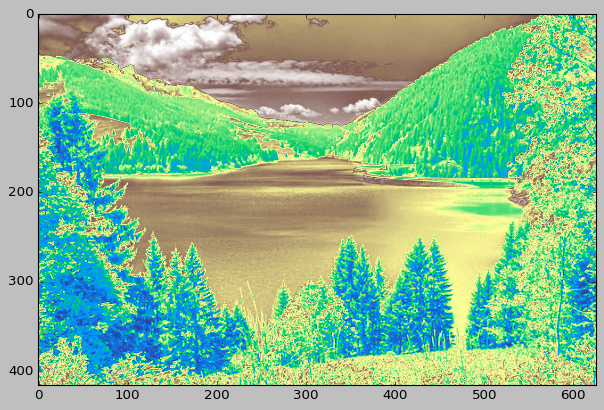

<PIL.Image.Image image mode=LA size=626x416 at 0x7F11F7750B50>


In [89]:
#imagen 2

img2 = Image.open(urllib.request.urlopen('https://img.freepik.com/foto-gratis/hermosa-vista-lago-rodeado-montanas-lago-longrin-presa-suiza_181624-27908.jpg?size=626&ext=jpg')).convert('LA')

imggray2 = img2.convert('LA')
imgmat2 = np.array(list(imggray2.getdata(band=0)),float)

print(imgmat2)

imgmat2.shape = (imggray2.size[1],imggray2.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat2,cmap='terrain')
plt.show()
print(img2)

In [90]:
U2,D2,V2 = np.linalg.svd(imgmat2)
imgmat2.shape

(416, 626)

In [91]:
U2.shape

(416, 416)

In [92]:
V2.shape

(626, 626)

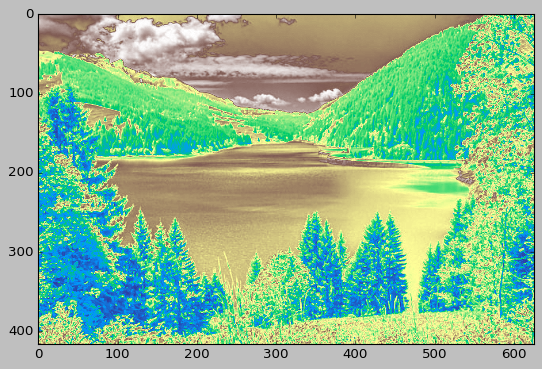

Felicidades la imagen está comprimida


In [93]:
#juega con el valor nvalue y ve que pasa con otros valores
nvalue2 = 410
#------------------------------
reconstimg2 = np.matrix(U2[:,:nvalue2])*np.diag(D2[:nvalue2])*np.matrix(V2[:nvalue2,:])
plt.imshow(reconstimg2,cmap='terrain')
plt.show()
print("Felicidades la imagen está comprimida")

[230. 229. 228. ... 227. 227. 227.]


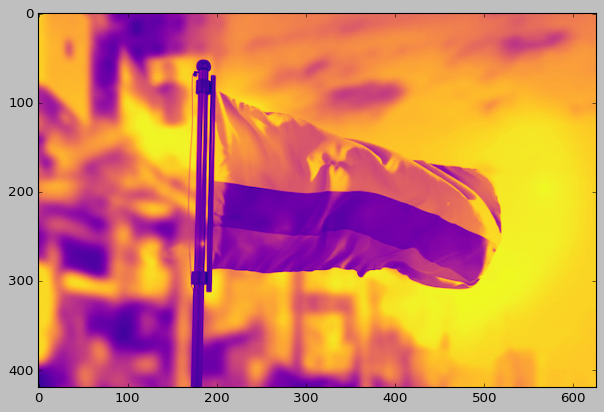

<PIL.Image.Image image mode=LA size=626x419 at 0x7F11F77F4550>


In [94]:
#imagen 3

img3 = Image.open(urllib.request.urlopen('https://img.freepik.com/fotos-premium/bandera-colombia-contra-ciudad-borrosa-fondo-salida-sol_1379-1744.jpg?size=626&ext=jpg&ga=GA1.2.737999208.1666794586&semt=sph')).convert('LA')

imggray3 = img3.convert('LA')
imgmat3 = np.array(list(imggray3.getdata(band=0)),float)

print(imgmat3)

imgmat3.shape = (imggray3.size[1],imggray3.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat3,cmap='plasma')
plt.show()
print(img3)

In [95]:
U3,D3,V3 = np.linalg.svd(imgmat3)
imgmat3.shape

(419, 626)

In [96]:
U3.shape

(419, 419)

In [97]:
V3.shape

(626, 626)

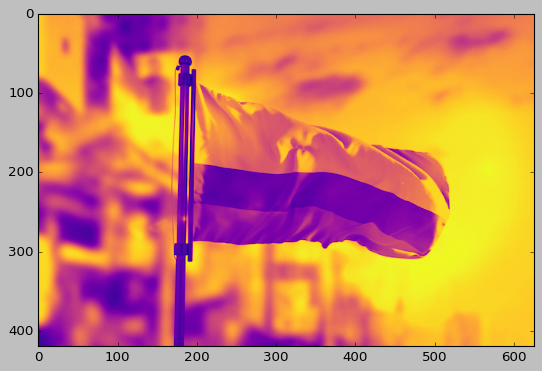

Felicidades la imagen está comprimida


In [98]:
#juega con el valor nvalue y ve que pasa con otros valores
nvalue3 = 300
#------------------------------
reconstimg3 = np.matrix(U3[:,:nvalue3])*np.diag(D3[:nvalue3])*np.matrix(V3[:nvalue3,:])
plt.imshow(reconstimg3,cmap='plasma')
plt.show()
print("Felicidades la imagen está comprimida")

***CONCLUSIONES***

*Como parte de las transformaciones de la imagen original, se pudo comprobar que es posible trabajar con imágenes de diferentes dimensiones, la forma de mostrarlas también fue interesante porque se pueden modificar las escalas de color y luego la reconstrucción puede llegar a cambiar la dimensionalidad.*

Se evidenció también que el nvalue tiene como tope el valor de U.

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [99]:
#tu codigo aqui

#Importamos las librerías con las que trabajaremos.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

# Cargamos los datos
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Definimos el escalamiento y transformamos los datos
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Escribimos el modelo PCA
pca = PCA(n_components=2) # 2 vectores
X_new = pca.fit_transform(X) 

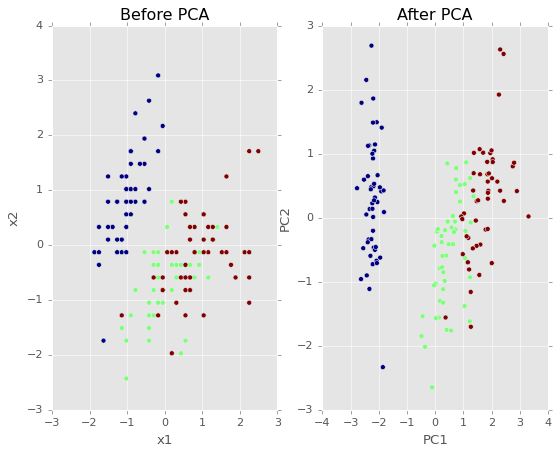

In [100]:
# Dado que definimos 2 vectores, se hace la comparación antes y después de aplicado PCA.
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [101]:
# Para conocer la varianza luego de aplicar PCA.
print(pca.explained_variance_ratio_)
#Aquí obtenemos que la varianza para PC1 es del 73% y para PC2 el 23%

[0.72962445 0.22850762]


In [102]:
#Hallamos la matriz de covarianza
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [103]:
#Confirmamos que la diagonal en la matriz de covarianza coincide con los PC de la varianza acumulada.
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [104]:
#Sacamos las características más importantes
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [105]:
# Graficamos usando Biplot

def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

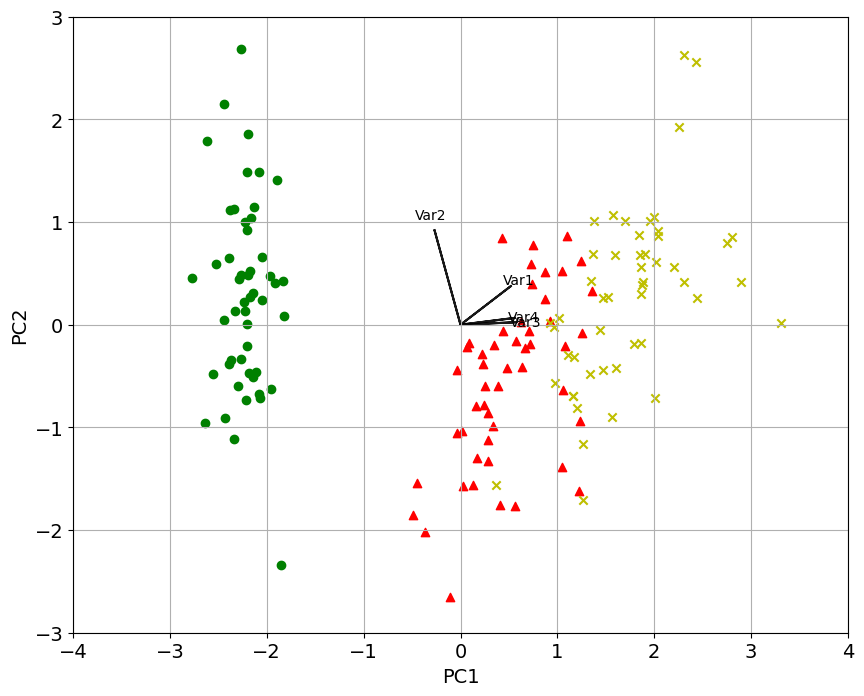

In [106]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [107]:
#Los siguientes códigos sirven para confirmar la varianza y los PC de mayor relevancia
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]


0.9628654314027957

In [108]:
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.

**¿Qué es feature importance y para que nos sirve?**

**RTA:** Feature Importance; "Asigna la puntuación de las características de entrada en función de su importancia para predecir el resultado. Cuanto más importantes sean las características para predecir el resultado, mayor será su puntuación." (Anand, Akhil 2020), una "subcapa" del método es Permnutation Feature Importance definido como: "Este método
puede utilizarse en el conjunto de entrenamiento o en el de prueba y validación y aquellas características que son importantes en el conjunto de entrenamiento, pero no en el de validación pueden ser aquellas que hacen que el modelo se sobre-ajuste.
(Pedregosa et al., 2011, )". En mis propias palabras podría definirlo como una técnica para inspeccionar variables según la importancia que se defina.

Al ser una técnica que valora las variables en función de su importancia, sus usos pueden estar presente en muchos estudios de comportamiento, por ejemplo, para predecir la depresión causa por el uso de smartphone (Asare et al., 2021)

***Referencia bibliográfica:***

Feature Importance Explained. 2020. Recuperado de: https://medium.com/analytics-vidhya/feature-importance-explained-bfc8d874bcf

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher,
M., Perrot, M., and Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12:2825–2830.

Asare, K. O., Terhorst, Y., Vega, J., Peltonen, E., Lagerspetz, E., & Ferreira, D. (2021). Predicting depression from smartphone behavioral markers using machine learning methods, hyperparameter optimization, and feature importance analysis: exploratory study. JMIR mHealth and uHealth, 9(7), e26540.

**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

**RTA:** Se pudo demostrar que el método o técnica de Feature Importance ayuda con la identificación de los componentes de mayor importancia o relevancia, yo la puedo relacionar con un Diagrama de Pareto en la que se busca una característica de mayor relevancia dentro de un conjunto de datos, se confirma lo que dice el autor que cuanto más grandes son estos valores absolutos, más contribuye una característica específica a ese componente principal.

**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

**RTA:** Son muchos los conjuntos de datos con variables categóricas que pueden ser analizados inicialmente con PCA y Feature Importance, recientemente estuve participando en una consultoría para mejorar el rendimiento de un Contact Center y se pudo concluir que con Feature Importance se tuvo un gran avance. Del mismo modo, iniciaré una revisión sistemática para validar aplicabilidad en el análisis de alarmas en una empresa de telecomunicaciones.